<a href="https://colab.research.google.com/github/shravanikalapure/Machine-Learning/blob/main/SVM_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Shravani Ranjeet Kalapure
#123B1B064

In [3]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [5]:
print("Features shape:", X.shape)
print("Target classes:", set(y))

Features shape: (178, 13)
Target classes: {np.int64(0), np.int64(1), np.int64(2)}


In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train, y_train)

SVC()

In [9]:
# Make predictions
y_pred = svm_clf.predict(X_test)

In [12]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(round(accuracy * 100, 2)) + "%")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))

Accuracy: 100.0%
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



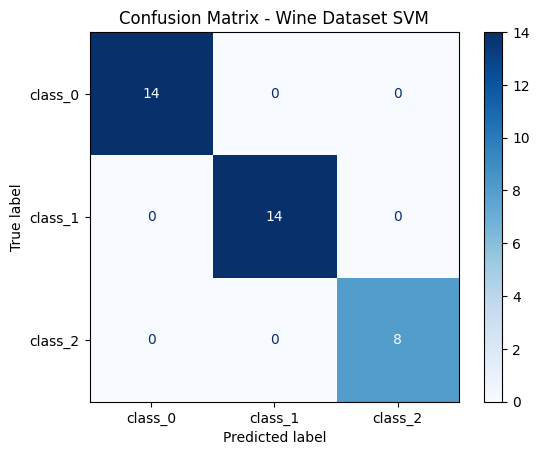

In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Wine Dataset SVM")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Create GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 97.88%


***SELF LEARNING***

**Hyperparameter Tuning using GridSearchCV**

In Support Vector Machines (SVM), the choice of hyperparameters such as C (regularization parameter), gamma (kernel coefficient), and kernel type (linear, polynomial, or RBF) significantly affects the model's performance. Selecting the optimal combination of these parameters manually can be tedious and error-prone.

GridSearchCV is a method provided by 'scikit-learn' that automates this process. It performs exhaustive search over a specified parameter grid using cross-validation to evaluate each combination. The output is the set of hyperparameters that achieves the best validation performance, which can then be applied to the test set for improved accuracy.

Benefits of using GridSearchCV with SVM:

1. Automatically finds the best combination of 'C', gamma and kernel type.
2. Improves the generalization and test performance of the model.
3. Demonstrates an advanced machine learning workflow and is a valuable skill for practical ML projects.

This approach not only optimizes SVM performance but also provides insight into how different hyperparameters affect the classifier’s behavior.